**BAŞLANGIÇ KÜTÜPHANELERİNİ EKLEME**

In [1]:
#Pandas NumPy ve Openpyxl kütüphanelerini ekledik.
import pandas as pd
import numpy as np
import openpyxl as opxl

#Görselleştirme kütüphanelerini ekledik.
import matplotlib.pyplot as plt
import seaborn as sns

**Openpyxl Kütüphanesini Daha Önce Kullanmadığımız İçin Kullanılabilecek Komutlara Göz Attık**

In [2]:
dir(opxl)

['DEBUG',
 'DEFUSEDXML',
 'LXML',
 'NUMPY',
 'Workbook',
 '__author__',
 '__author_email__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__maintainer_email__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__url__',
 '__version__',
 '_constants',
 'cell',
 'chart',
 'chartsheet',
 'comments',
 'compat',
 'constants',
 'descriptors',
 'drawing',
 'formatting',
 'formula',
 'load_workbook',
 'open',
 'packaging',
 'pivot',
 'reader',
 'styles',
 'utils',
 'workbook',
 'worksheet',
 'writer',
 'xml']

**VERİ SETİ EKLEME**

In [3]:
# Excel uzantılı veri setimizi notebookumuza yükledik.
coffeedata = opxl.load_workbook("/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx")

# İlk çalışma sayfasını seçtik.
sheet = coffeedata.active

# Çalışma sayfasını pandas DataFrame'e dönüştürdük.
data = sheet.values
columns = next(data)  
# İlk satırı kolon adı olarak aldık.
coffee_data = pd.DataFrame(data, columns=columns)


**VERİ SETİNDE İLK İNCELEME**

**Veri Setimizde Veri Uzunluğunu Bulalım**

In [4]:
len(coffee_data)

149116

**Verimizdeki Kolon ve Satır Sayısını İnceleyelim**

In [5]:
# .shape komutu bize veri setimizde kaç kolon ve kaç satır olduğunun bilgisini vermektedir.

coffee_data.shape

# Veri setimizdeki 149116 verimiz 11 kolon ile (farklı bilgiler ile) nitelendirilmiştir.

(149116, 11)

**Veri Setimizdeki İlk 4 Veriyi İnceleyelim**

In [6]:
#Veri setimizin ilk 4 satırındaki verileri bu metot ile görüntüledik.
coffee_data.head(n=4)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm


**Veri Setimizdeki Son 5 Veriyi İnceleyelim**

In [7]:
#Veri setimizdeki son 5 satırına .tail komutuyla ulaşabildik.
coffee_data.tail(5)

#Veri setimizde son verinin 149115 çıkmasının nedeni index sayısının 0'dan başlamasıdır.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


**VERİ SETİMİZDE BAZI DEĞİŞİKLİKLER**

In [8]:
import random
import numpy as np
import pandas as pd

def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.02, seed: int = 25) -> pd.DataFrame:
    
    
    df_missing = dataframe.copy()

    # DataFrame boyutlarını aldık
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)  # Eksik değer sayısını belirler

    # Rastgele seed belirledik
    random.seed(seed)

    # Rastgele satır ve kolonlarda NaN değeri atamasını yaptık
    for _ in range(num_missing):
        # Satır seçimi (0 ile 149115 arasında, toplamda 149116 satır)
        row_idx = random.randint(0, 149115)  

        # Kolon seçimi (0 ile 10 arasında, toplamda 11 kolon)
        col_idx = random.randint(0, 10)

        # NaN değeri atadık
        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

# coffee_data DataFrame'inize rastgele eksik değerler ekledik
coffee_data_with_missing = add_random_missing_values(coffee_data, missing_rate=0.02)





**YENİ VERİ SETİMİZİ TEKRARDAN İNCELEYELİM**

In [9]:
#Veri setimizin ilk 25 verisini bu metot ile görüntüledik.
coffee_data.head(n=25)
#Veri setimizdeki değişiklikler ilk 25 satırımıza yansımamış ve boş bir veri göremedik.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [10]:
#Veri setimizdeki son 100 satırına .tail komutuyla ulaşabildik.
coffee_data.tail(100)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149016,149357,2023-06-30,17:59:51,1,8,Hell's Kitchen,73,3.75,Bakery,Pastry,Almond Croissant
149017,149358,2023-06-30,17:59:51,1,8,Hell's Kitchen,19,6.40,Packaged Chocolate,Drinking Chocolate,Dark chocolate
149018,149359,2023-06-30,18:01:57,2,5,Lower Manhattan,30,3.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg
149019,149360,2023-06-30,18:02:37,2,5,Lower Manhattan,52,2.50,Tea,Brewed Chai tea,Traditional Blend Chai Rg
149020,149361,2023-06-30,18:02:37,1,5,Lower Manhattan,70,3.25,Bakery,Scone,Cranberry Scone
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [11]:
#Veri setimizin uzunluğuna bu metot ile ulaştık.
len(coffee_data)

#Görüldüğü üzere veri setimizde 149116 veri bulunmakta çünkü herhangi bir kolonunda null değeri içeren verilerimizi daha silmedik. 

149116

**NaN VERİLERİ GÖSTERME**

In [12]:
nan_rows = coffee_data_with_missing[coffee_data_with_missing.isna().any(axis=1)]
print(nan_rows)
#Burada herhangi bir kolonunda nan değerleri bulunan satırları görmekteyiz.

        transaction_id transaction_date transaction_time  transaction_qty  \
0                  NaN       2023-01-01         07:06:11              2.0   
2                  3.0       2023-01-01         07:14:04              NaN   
4                  5.0              NaT              NaN              2.0   
6                  7.0       2023-01-01         07:25:49              1.0   
7                  8.0       2023-01-01         07:33:34              2.0   
...                ...              ...              ...              ...   
149076        149417.0       2023-06-30              NaN              2.0   
149086             NaN       2023-06-30         19:31:03              1.0   
149093        149434.0       2023-06-30         19:39:19              1.0   
149097        149438.0              NaT         19:45:16              1.0   
149102        149443.0       2023-06-30         19:46:43              2.0   

        store_id   store_location  product_id  unit_price    product_catego

In [13]:
coffee_data.info()
#Burada data setimiz hakkında bilgiler edindik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


**HERHANGİ BİR KOLONUNDA NaN DEĞERİ BULUNAN VERİLERİ SİLME**

In [14]:
# Herhangi bir kolonunda null değeri içeren satırları silme işlemini yaptık.
cleaned_data_rows = coffee_data_with_missing.dropna(axis=0)

print(cleaned_data_rows)
#Bu kod satırı sonucunda geriye kalan satır ve kolon sayımızı görmüş olduk.

        transaction_id transaction_date transaction_time  transaction_qty  \
1                  2.0       2023-01-01         07:08:56              2.0   
3                  4.0       2023-01-01         07:20:24              1.0   
5                  6.0       2023-01-01         07:22:41              1.0   
8                  9.0       2023-01-01         07:39:13              1.0   
9                 10.0       2023-01-01         07:39:34              2.0   
...                ...              ...              ...              ...   
149111        149452.0       2023-06-30         20:18:41              2.0   
149112        149453.0       2023-06-30         20:25:10              2.0   
149113        149454.0       2023-06-30         20:31:34              1.0   
149114        149455.0       2023-06-30         20:57:19              1.0   
149115        149456.0       2023-06-30         20:57:19              2.0   

        store_id   store_location  product_id  unit_price    product_catego

**YENİ DATA SETİMİZİ KAYDETTİK**

In [15]:
# Yeni düzenlenen veri setini CSV formatında kaydettik.
cleaned_data_rows.to_csv("/kaggle/working/cleaned_coffee_data.csv", index=False)


In [16]:
new_coffee_data=cleaned_data_rows
#Yeni data setimizin atamasını yaptık.


In [17]:
print(new_coffee_data)
#Yeni datasetimizi yazdırdık.

        transaction_id transaction_date transaction_time  transaction_qty  \
1                  2.0       2023-01-01         07:08:56              2.0   
3                  4.0       2023-01-01         07:20:24              1.0   
5                  6.0       2023-01-01         07:22:41              1.0   
8                  9.0       2023-01-01         07:39:13              1.0   
9                 10.0       2023-01-01         07:39:34              2.0   
...                ...              ...              ...              ...   
149111        149452.0       2023-06-30         20:18:41              2.0   
149112        149453.0       2023-06-30         20:25:10              2.0   
149113        149454.0       2023-06-30         20:31:34              1.0   
149114        149455.0       2023-06-30         20:57:19              1.0   
149115        149456.0       2023-06-30         20:57:19              2.0   

        store_id   store_location  product_id  unit_price    product_catego

**DÜZENLENMİŞ DATASET'İMİZİ İNCELEYELİM**

**Düzenlenmiş DataSet'imizin Uzunluğuna Göz Atalım**

In [18]:
len(new_coffee_data)

119643

**Düzenlenmiş DataSet'imizin İçerisinde Null Değerleri Olmayan Verilerin Satır ve Sütun Sayılarına Göz Atalım**

In [19]:
new_coffee_data.shape

(119643, 11)

**Düzenlenmiş DataSet'imizin İlk 4 Verisine Göz Atalım**

In [20]:
new_coffee_data.head(n=4)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
5,6.0,2023-01-01,07:22:41,1.0,5.0,Lower Manhattan,77.0,3.00,Bakery,Scone,Oatmeal Scone
8,9.0,2023-01-01,07:39:13,1.0,5.0,Lower Manhattan,39.0,4.25,Coffee,Barista Espresso,Latte Rg


**Düzenlenmiş DataSetimizin Son 20 Verisine Göz Atalım**

In [21]:
new_coffee_data.tail(20)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149094,149435.0,2023-06-30,19:40:09,2.0,5.0,Lower Manhattan,58.0,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg
149095,149436.0,2023-06-30,19:44:46,1.0,3.0,Astoria,60.0,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg
149096,149437.0,2023-06-30,19:44:46,2.0,3.0,Astoria,72.0,3.25,Bakery,Scone,Ginger Scone
149098,149439.0,2023-06-30,19:45:52,1.0,3.0,Astoria,46.0,2.50,Tea,Brewed Green tea,Serenity Green Tea Rg
149099,149440.0,2023-06-30,19:46:02,2.0,8.0,Hell's Kitchen,55.0,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg
149100,149441.0,2023-06-30,19:46:28,1.0,8.0,Hell's Kitchen,27.0,3.50,Coffee,Organic brewed coffee,Brazilian Lg
149101,149442.0,2023-06-30,19:46:28,1.0,8.0,Hell's Kitchen,75.0,3.50,Bakery,Pastry,Croissant
149103,149444.0,2023-06-30,19:51:59,2.0,3.0,Astoria,26.0,3.00,Coffee,Organic brewed coffee,Brazilian Rg
149104,149445.0,2023-06-30,19:52:28,2.0,3.0,Astoria,34.0,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm
149105,149446.0,2023-06-30,19:53:46,1.0,3.0,Astoria,24.0,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg


**Düzenlemiş Olduğumuz DataSet'imizin İçerisinde null Değer İçeren Veri Kalmış mı Kontrol Edelim**

In [22]:
new_coffee_data.isna().sum().sum()
#Görüldüğü üzere düzenlemiş olduğumuz datasetimizin içerisinde herhangi bir null değeri içeren veri kalmamıştır.

0

In [23]:
new_coffee_data.notnull().sum()
#İçerisinde herhangi bir null değeri bulunmayan verilerimizin sayısını göstermektedir.

transaction_id      119643
transaction_date    119643
transaction_time    119643
transaction_qty     119643
store_id            119643
store_location      119643
product_id          119643
unit_price          119643
product_category    119643
product_type        119643
product_detail      119643
dtype: int64

In [24]:
dir(plt)
#Burada komutları bilmediğimiz için bir gözlem yaptık.

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_docstring',
 '_draw_all_if_interactive',
 '_get_backend_mod',
 '_get_pyplot_commands

**Burada Yeni DataSetimizi Bir Grafiğe Dökelim**

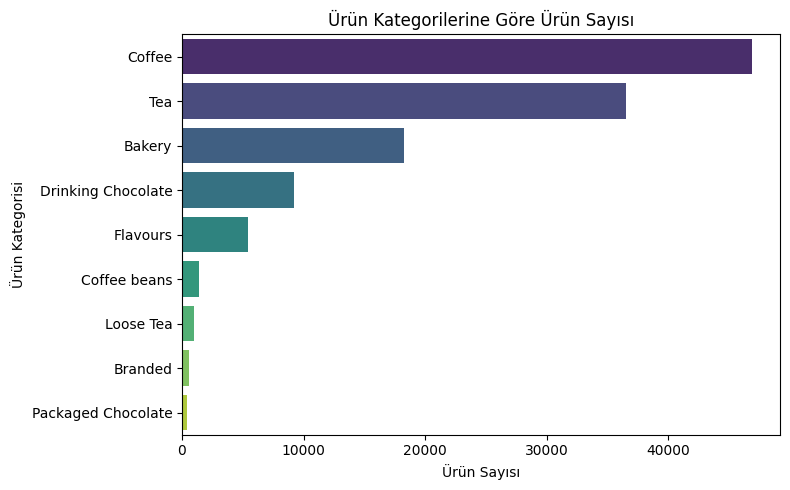

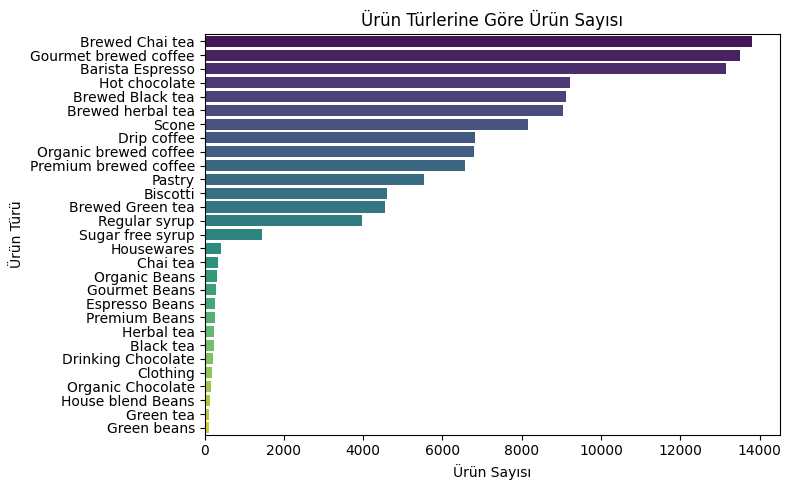

In [25]:
# Ürün kategorisi ve türüne göre ürün sayısını hesapladık.
category_count = cleaned_data_rows.groupby('product_category')['product_id'].count().reset_index()
type_count = cleaned_data_rows.groupby('product_type')['product_id'].count().reset_index()

# Ürün kategorilerini ürün sayısına göre azalan şekilde sıraladık.
category_count = category_count.sort_values(by='product_id', ascending=False)

# Ürün türlerini ürün sayısına göre azalan şekilde sıraladık.
type_count = type_count.sort_values(by='product_id', ascending=False)

# Ürün kategorilerine göre ürün sayısı grafiğidir.
plt.figure(figsize=(8, 5))

sns.barplot(x='product_id', y='product_category', data=category_count, palette='viridis')

plt.title('Ürün Kategorilerine Göre Ürün Sayısı')
plt.xlabel('Ürün Sayısı')
plt.ylabel('Ürün Kategorisi')
plt.tight_layout()
plt.show()

# Ürün türlerine göre ürün sayısı grafiğidir.
plt.figure(figsize=(8, 5))

sns.barplot(x='product_id', y='product_type', data=type_count, palette='viridis')

plt.title('Ürün Türlerine Göre Ürün Sayısı')
plt.xlabel('Ürün Sayısı')
plt.ylabel('Ürün Türü')
plt.tight_layout()
plt.show()


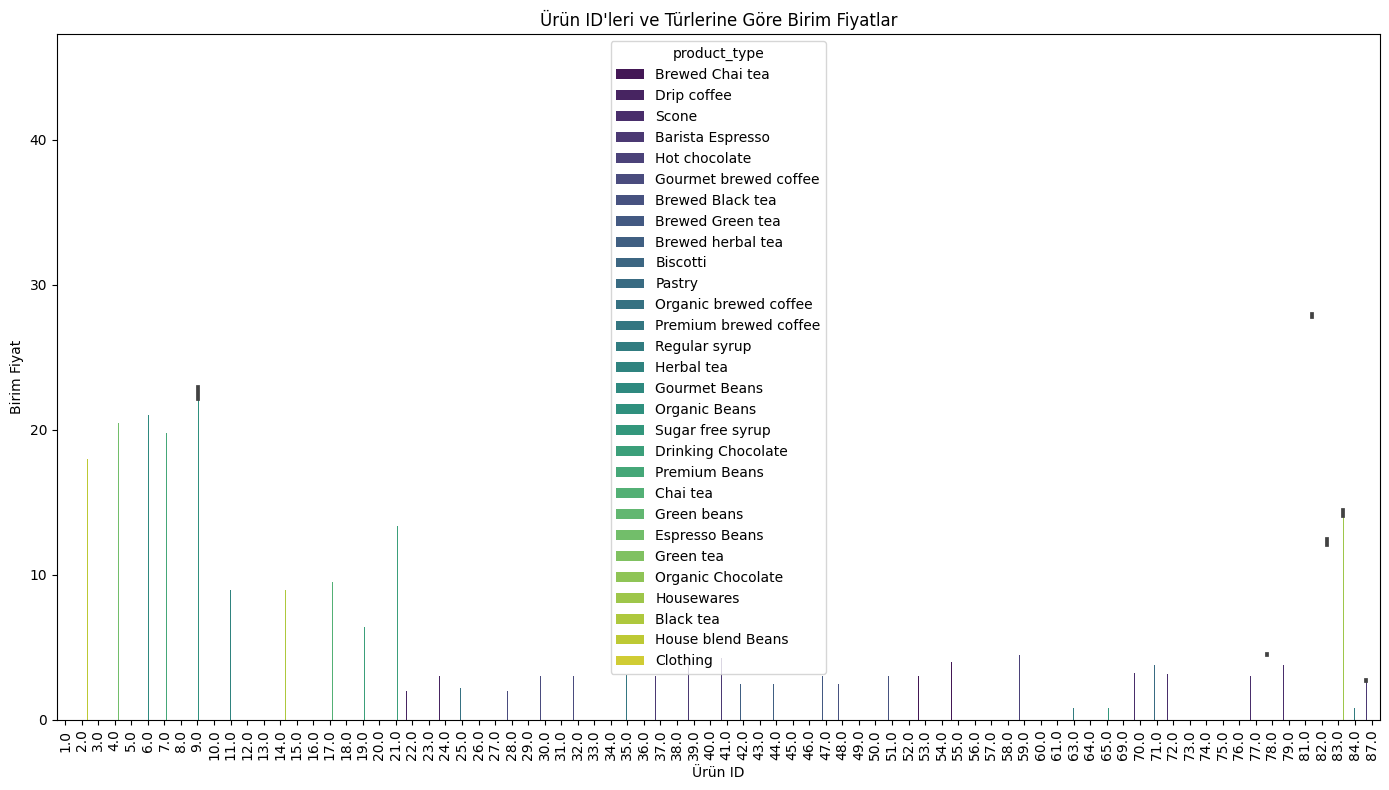

In [26]:
# 'product_id', 'product_type' ve 'unit_price' verisini içeren bir grafik oluşturduk.
plt.figure(figsize=(14, 8))
sns.barplot(x='product_id', y='unit_price', hue='product_type', data=cleaned_data_rows, palette='viridis')
plt.title('Ürün ID\'leri ve Türlerine Göre Birim Fiyatlar')
plt.xlabel('Ürün ID')
plt.ylabel('Birim Fiyat')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()



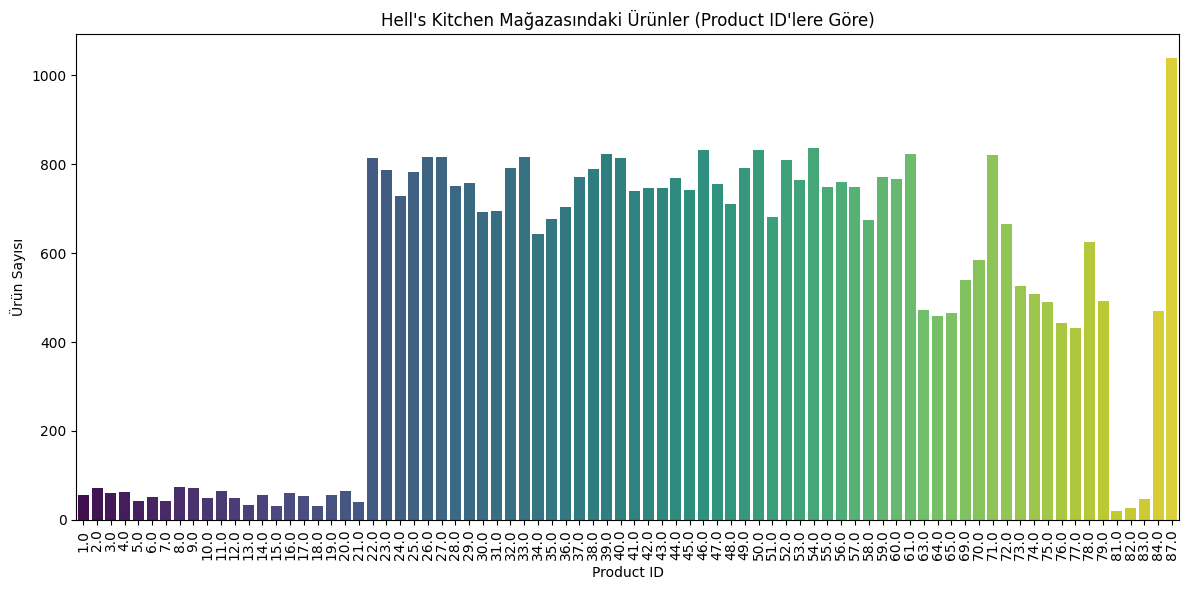

In [27]:
# 'store_location' kolonu 'Hell's Kitchen' olan ürünleri filtreledik.
hells_kitchen_products = cleaned_data_rows[new_coffee_data['store_location'] == "Hell's Kitchen"]

# 'product_id' sütunu için sayım grafiği oluşturduk.
plt.figure(figsize=(12, 6))

sns.countplot(x='product_id', data=hells_kitchen_products, palette='viridis')
plt.title("Hell's Kitchen Mağazasındaki Ürünler (Product ID'lere Göre)")
plt.xlabel('Product ID')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

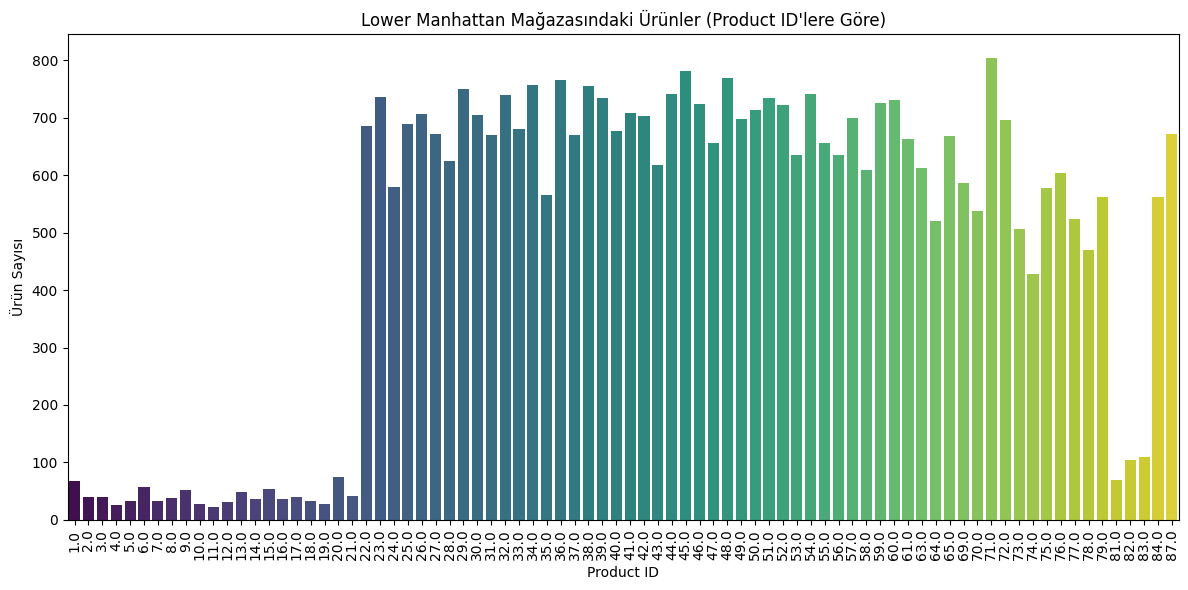

In [28]:
# 'store_location' kolonu 'Lower Manhattan' olan ürünleri filtreledik.
lower_manhattan_products = cleaned_data_rows[new_coffee_data['store_location'] == "Lower Manhattan"]

# 'product_id' sütunu için sayım grafiği oluşturduk.
plt.figure(figsize=(12, 6))

sns.countplot(x='product_id', data=lower_manhattan_products, palette='viridis')

plt.title("Lower Manhattan Mağazasındaki Ürünler (Product ID'lere Göre)")
plt.xlabel('Product ID')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


**KOLONDA İSİM DEĞİŞİKLİĞİ**

In [29]:
# 'store_location' kolonunun ismini 'magaza_ismi' olarak değiştirdik.
cleaned_data_rows = cleaned_data_rows.rename(columns={'store_location': 'magaza_ismi'})

# Yeni ismin doğruluğunu kontrol ettik.
print(cleaned_data_rows.head(n=10))

    transaction_id transaction_date transaction_time  transaction_qty  \
1              2.0       2023-01-01         07:08:56              2.0   
3              4.0       2023-01-01         07:20:24              1.0   
5              6.0       2023-01-01         07:22:41              1.0   
8              9.0       2023-01-01         07:39:13              1.0   
9             10.0       2023-01-01         07:39:34              2.0   
10            11.0       2023-01-01         07:43:05              1.0   
11            12.0       2023-01-01         07:44:35              2.0   
12            13.0       2023-01-01         07:45:51              1.0   
14            15.0       2023-01-01         07:52:36              2.0   
15            16.0       2023-01-01         07:59:58              2.0   

    store_id      magaza_ismi  product_id  unit_price    product_category  \
1        5.0  Lower Manhattan        57.0        3.10                 Tea   
3        5.0  Lower Manhattan        22.0 

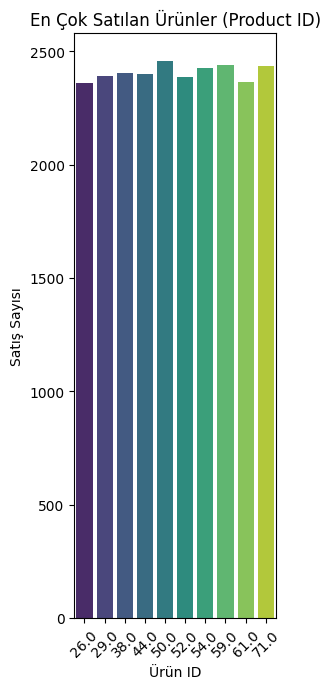

In [30]:
# En çok satılan ürünleri bulmak için 'product_id' veya 'product_name' kolonundaki değerleri saydık.
most_sold_products = cleaned_data_rows['product_id'].value_counts().reset_index()
most_sold_products.columns = ['product_id', 'sales_count']  

# İlk 10 ürünü görselleştirmek istedik.
plt.figure(figsize=(3, 7))
sns.barplot(x='product_id', y='sales_count', data=most_sold_products.head(10), palette='viridis')

plt.title("En Çok Satılan Ürünler (Product ID)")
plt.xlabel('Ürün ID')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**NUMERİK KOLONLARI SEÇME**

In [31]:
#Veri setimizdeki sayısal türdeki sütunları seçerek yalnızca bu sütunları içeren yeni bir veri seti oluşturduk ve bu yeni veri setinin ilk 20 satırını görüntüledik.
new_coffee_data_numerical = new_coffee_data.select_dtypes(include = ["float64", "int64"])
new_coffee_data_numerical.head(n=20)

,transaction_id,transaction_qty,store_id,product_id,unit_price
1,2.0,2.0,5.0,57.0,3.10
3,4.0,1.0,5.0,22.0,2.00
5,6.0,1.0,5.0,77.0,3.00
8,9.0,1.0,5.0,39.0,4.25
9,10.0,2.0,5.0,58.0,3.50
10,11.0,1.0,5.0,56.0,2.55
11,12.0,2.0,5.0,33.0,3.50
12,13.0,1.0,5.0,51.0,3.00
14,15.0,2.0,5.0,87.0,3.00
15,16.0,2.0,5.0,47.0,3.00


**NUMERİK DEĞİŞKEN YOĞUNLUĞU**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


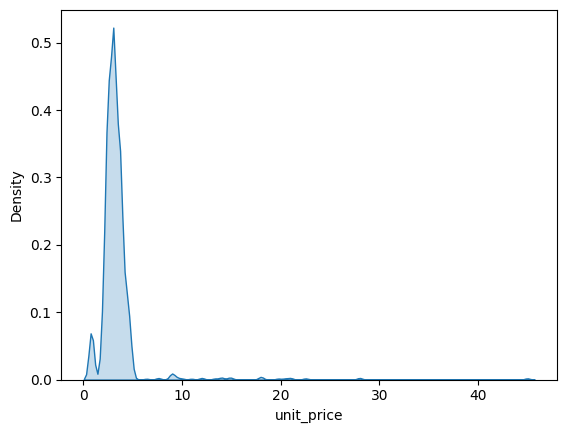

In [32]:
#İlgili numerik değişkenin yoğunluğunu gösterdik.
sns.kdeplot(new_coffee_data['unit_price'], fill = True);

**BELLİ BİR SÜTUNU BİR DEĞİŞKENE ATAMA**

In [33]:
#Veri setimizden yalnızca unit_price sütununu seçtik ve bunu bir değişkene atadık.
new_coffee_data_unit_price = new_coffee_data['unit_price']
new_coffee_data_unit_price

1         3.10
3         2.00
5         3.00
8         4.25
9         3.50
          ... 
149111    2.50
149112    3.00
149113    3.00
149114    3.75
149115    0.80
Name: unit_price, Length: 119643, dtype: float64

**ALT VE ÜST SINIRLARI BELİRLEME**

In [34]:
A = new_coffee_data_unit_price.quantile(0.25)
B = new_coffee_data_unit_price.quantile(0.75)

print(A)
print(B)

C = B-A
print(C)

# Alt ve üst sınırlarını belirledik
lower_fence = A - 1.5*C
upper_fence = B + 1.5*C


2.5
3.75
1.25


In [35]:
new_coffee_data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
5,6.0,2023-01-01,07:22:41,1.0,5.0,Lower Manhattan,77.0,3.00,Bakery,Scone,Oatmeal Scone
8,9.0,2023-01-01,07:39:13,1.0,5.0,Lower Manhattan,39.0,4.25,Coffee,Barista Espresso,Latte Rg
9,10.0,2023-01-01,07:39:34,2.0,5.0,Lower Manhattan,58.0,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453.0,2023-06-30,20:25:10,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino


**UNIT_PRICE'DAKİ DEĞERLERİ DOLAR BAZINDA SAYIP TÜRK LİRASI GRAFİĞİNİ ÇIKARDIK**

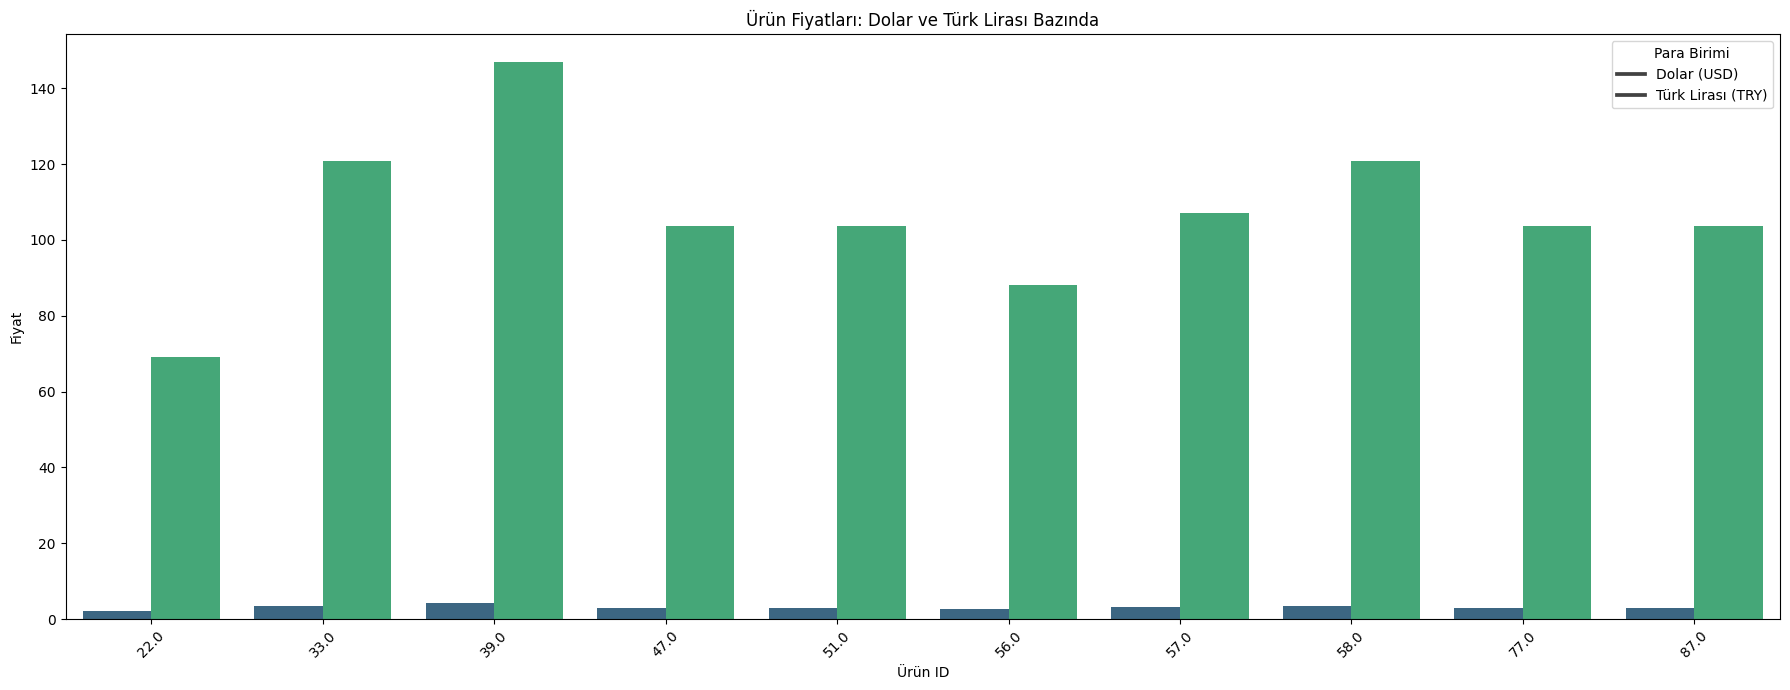

In [36]:
# Dolar-TL kuru (1 USD = 34.55 TL)
usd_to_try = 34.55

# 'unit_price' kolonundaki fiyatları Türk Lirası'na dönüştürüp yeni bir kolon ekledik.
cleaned_data_rows['unit_price_tl'] = cleaned_data_rows['unit_price'] * usd_to_try

# İlk 10 ürünü örnek olarak seçtik.
sample_data = cleaned_data_rows[['product_id', 'unit_price', 'unit_price_tl']].head(10)

melted_data = sample_data.melt(id_vars='product_id', 
                               value_vars=['unit_price', 'unit_price_tl'], 
                               var_name='currency', 
                               value_name='price')

plt.figure(figsize=(18, 7))
sns.barplot(x='product_id', y='price', hue='currency', data=melted_data, palette='viridis')

plt.title("Ürün Fiyatları: Dolar ve Türk Lirası Bazında")
plt.xlabel("Ürün ID")
plt.ylabel("Fiyat")
plt.legend(title="Para Birimi", labels=["Dolar (USD)", "Türk Lirası (TRY)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()